In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
import os

In [2]:
"""Importamos el archivo"""
os.listdir()

['.DS_Store',
 'Practica1 Mod3 Equipo2-Copy1.ipynb',
 'Fraud_Data_sep.txt',
 '.ipynb_checkpoints',
 'P1 G1303.pdf',
 'Practica1 Mod3 Equipo2.ipynb']

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df=pd.read_csv("Fraud_Data_sep.txt",sep="|")
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,interest_rate,debt,term,enrichment_CRIM,enrichment_ZN,enrichment_INDUS,enrichment_CHAS,enrichment_NOX,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_TAX,enrichment_PTRATIO,enrichment_B,enrichment_LSTAT
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4550.0,0,0.176965,384.701865,13,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,'C1093826151','4',NaN,'28007','M855959430','28007','es_hyper',14380.0,0,0.151851,5346.143350,13,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,NaN,15.3,NaN,4.98
2,2,'C1093826151','4','M','28007','M348934600','28007','es_transportation',37210.0,0,0.114909,15249.782295,13,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
3,3,'C1093826151','4','M','28007','M348934600','28007','es_transportation',31630.0,0,0.177298,4101.539296,13,0.00632,18.0,2.31,0.0,NaN,6.575,4.0900,NaN,296.0,15.3,NaN,4.98
4,4,'C1093826151','4','M','28007','M348934600','28007','es_transportation',35860.0,0,0.087209,14069.969512,13,NaN,18.0,2.31,NaN,0.538,6.575,4.0900,1.0,296.0,15.3,NaN,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,135,'C1809646275','3','F','28007','M480139044','28007','es_health',274070.0,1,0.048787,132128.846791,0,NaN,25.0,5.13,0.0,0.453,6.762,7.9809,NaN,284.0,19.7,395.58,9.50
594639,149,'C1809646275','3','F','28007','M980657600','28007','es_sportsandtoys',258290.0,1,0.087178,20163.667699,0,0.12650,25.0,5.13,NaN,NaN,6.762,7.9809,8.0,NaN,19.7,NaN,9.50
594640,152,'C1809646275','3','F','28007','M980657600','28007','es_sportsandtoys',64760.0,0,0.012046,6484.634258,0,NaN,25.0,5.13,NaN,NaN,6.762,7.9809,8.0,284.0,19.7,NaN,9.50
594641,152,'C1809646275','3',NaN,'28007','M2122776122','28007','es_home',139140.0,1,NaN,48207.639552,0,NaN,25.0,NaN,0.0,0.453,6.762,7.9809,8.0,284.0,19.7,NaN,9.50


# Exploración y limpieza de los datos

In [5]:
df.dtypes

step                    int64
customer               object
age                    object
gender                 object
zipcodeOri             object
merchant               object
zipMerchant            object
category               object
amount                float64
fraud                   int64
interest_rate         float64
debt                  float64
term                    int64
enrichment_CRIM       float64
enrichment_ZN         float64
enrichment_INDUS      float64
enrichment_CHAS       float64
enrichment_NOX        float64
enrichment_RM         float64
enrichment_DIS        float64
enrichment_RAD        float64
enrichment_TAX        float64
enrichment_PTRATIO    float64
enrichment_B          float64
enrichment_LSTAT      float64
dtype: object

In [6]:
df.isnull().sum()

step                       0
customer                   0
age                    29643
gender                 71178
zipcodeOri                 0
merchant                   0
zipMerchant                0
category                   0
amount                     0
fraud                      0
interest_rate         237305
debt                       0
term                       0
enrichment_CRIM       238062
enrichment_ZN          59529
enrichment_INDUS       59109
enrichment_CHAS       237659
enrichment_NOX        237366
enrichment_RM          59198
enrichment_DIS         29750
enrichment_RAD         59713
enrichment_TAX        237700
enrichment_PTRATIO     59202
enrichment_B          237704
enrichment_LSTAT       59571
dtype: int64

In [7]:
df["age"].value_counts(dropna=False)

'2'    177868
'3'    139839
'4'    103682
'5'     59495
'1'     55217
NaN     29643
'6'     25463
'0'      2305
'U'      1131
Name: age, dtype: int64

In [8]:
df["gender"].value_counts(dropna=False)

'F'    285518
'M'    236433
NaN     71178
'E'      1057
'U'       457
Name: gender, dtype: int64

In [9]:
"""Normalizamos los nulos de age y gender en la categoria U"""
df["age"]=df["age"].fillna("'U'")
df["gender"]=df["gender"].fillna("'U'")

In [10]:
df["age"].value_counts(dropna=False)

'2'    177868
'3'    139839
'4'    103682
'5'     59495
'1'     55217
'U'     30774
'6'     25463
'0'      2305
Name: age, dtype: int64

In [11]:
df["gender"].value_counts(dropna=False)

'F'    285518
'M'    236433
'U'     71635
'E'      1057
Name: gender, dtype: int64

In [12]:
"""Limpiamos los datos de tipo texto"""
df["customer"]=df["customer"].map(lambda x: x.strip("'"))
df["age"]=df["age"].map(lambda x: str(x).strip("'"))
df["gender"]=df["gender"].map(lambda x: str(x).strip("'"))
df["zipcodeOri"]=df["zipcodeOri"].map(lambda x:x.strip("'"))
df["merchant"]=df["merchant"].map(lambda x:x.strip("'"))
df["zipMerchant"]=df["zipMerchant"].map(lambda x:x.strip("'"))
df["category"]=df["category"].map(lambda x:x.strip("'"))

In [13]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,interest_rate,debt,term,enrichment_CRIM,enrichment_ZN,enrichment_INDUS,enrichment_CHAS,enrichment_NOX,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_TAX,enrichment_PTRATIO,enrichment_B,enrichment_LSTAT
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4550.0,0,0.176965,384.701865,13,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,C1093826151,4,U,28007,M855959430,28007,es_hyper,14380.0,0,0.151851,5346.143350,13,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,NaN,15.3,NaN,4.98
2,2,C1093826151,4,M,28007,M348934600,28007,es_transportation,37210.0,0,0.114909,15249.782295,13,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
3,3,C1093826151,4,M,28007,M348934600,28007,es_transportation,31630.0,0,0.177298,4101.539296,13,0.00632,18.0,2.31,0.0,NaN,6.575,4.0900,NaN,296.0,15.3,NaN,4.98
4,4,C1093826151,4,M,28007,M348934600,28007,es_transportation,35860.0,0,0.087209,14069.969512,13,NaN,18.0,2.31,NaN,0.538,6.575,4.0900,1.0,296.0,15.3,NaN,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,135,C1809646275,3,F,28007,M480139044,28007,es_health,274070.0,1,0.048787,132128.846791,0,NaN,25.0,5.13,0.0,0.453,6.762,7.9809,NaN,284.0,19.7,395.58,9.50
594639,149,C1809646275,3,F,28007,M980657600,28007,es_sportsandtoys,258290.0,1,0.087178,20163.667699,0,0.12650,25.0,5.13,NaN,NaN,6.762,7.9809,8.0,NaN,19.7,NaN,9.50
594640,152,C1809646275,3,F,28007,M980657600,28007,es_sportsandtoys,64760.0,0,0.012046,6484.634258,0,NaN,25.0,5.13,NaN,NaN,6.762,7.9809,8.0,284.0,19.7,NaN,9.50
594641,152,C1809646275,3,U,28007,M2122776122,28007,es_home,139140.0,1,NaN,48207.639552,0,NaN,25.0,NaN,0.0,0.453,6.762,7.9809,8.0,284.0,19.7,NaN,9.50


# Datos faltantes

In [14]:
df.isnull().sum()

step                       0
customer                   0
age                        0
gender                     0
zipcodeOri                 0
merchant                   0
zipMerchant                0
category                   0
amount                     0
fraud                      0
interest_rate         237305
debt                       0
term                       0
enrichment_CRIM       238062
enrichment_ZN          59529
enrichment_INDUS       59109
enrichment_CHAS       237659
enrichment_NOX        237366
enrichment_RM          59198
enrichment_DIS         29750
enrichment_RAD         59713
enrichment_TAX        237700
enrichment_PTRATIO     59202
enrichment_B          237704
enrichment_LSTAT       59571
dtype: int64

In [15]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table = pd.DataFrame(mz_table)
        return mz_table
table=missing_zero_values_table(df)
table

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
step,2430,0,0.000000,2430
customer,0,0,0.000000,0
age,0,0,0.000000,0
gender,0,0,0.000000,0
zipcodeOri,0,0,0.000000,0
merchant,0,0,0.000000,0
zipMerchant,0,0,0.000000,0
category,0,0,0.000000,0
amount,52,0,0.000000,52
fraud,587443,0,0.000000,587443


In [16]:
variables_reducidas = list(table.loc[table["% of Total Values"]<10.5].index) 
#Nos quedamos con las columnas con menos de 10.5% de nulos

In [17]:
df_reducido=df[variables_reducidas].copy()
df_reducido

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,debt,term,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4550.0,0,384.701865,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
1,1,C1093826151,4,U,28007,M855959430,28007,es_hyper,14380.0,0,5346.143350,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
2,2,C1093826151,4,M,28007,M348934600,28007,es_transportation,37210.0,0,15249.782295,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
3,3,C1093826151,4,M,28007,M348934600,28007,es_transportation,31630.0,0,4101.539296,13,18.0,2.31,6.575,4.0900,NaN,15.3,4.98
4,4,C1093826151,4,M,28007,M348934600,28007,es_transportation,35860.0,0,14069.969512,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,135,C1809646275,3,F,28007,M480139044,28007,es_health,274070.0,1,132128.846791,0,25.0,5.13,6.762,7.9809,NaN,19.7,9.50
594639,149,C1809646275,3,F,28007,M980657600,28007,es_sportsandtoys,258290.0,1,20163.667699,0,25.0,5.13,6.762,7.9809,8.0,19.7,9.50
594640,152,C1809646275,3,F,28007,M980657600,28007,es_sportsandtoys,64760.0,0,6484.634258,0,25.0,5.13,6.762,7.9809,8.0,19.7,9.50
594641,152,C1809646275,3,U,28007,M2122776122,28007,es_home,139140.0,1,48207.639552,0,25.0,NaN,6.762,7.9809,8.0,19.7,9.50


In [18]:
missing_zero_values_table(df_reducido)

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values
step,2430,0,0.000000,2430
customer,0,0,0.000000,0
age,0,0,0.000000,0
gender,0,0,0.000000,0
zipcodeOri,0,0,0.000000,0
merchant,0,0,0.000000,0
zipMerchant,0,0,0.000000,0
category,0,0,0.000000,0
amount,52,0,0.000000,52
fraud,587443,0,0.000000,587443


In [19]:
type(df["gender"][1])

str

In [20]:
df_reducido["fraud"].value_counts(dropna=True) #Vemos que tan bien esta balanceadas las clase de fraude

0    587443
1      7200
Name: fraud, dtype: int64

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

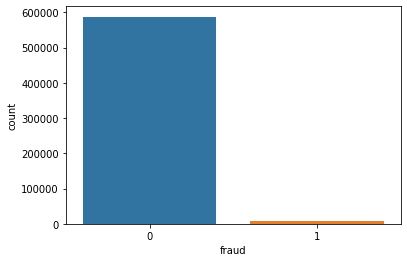

In [21]:
sns.countplot(df_reducido["fraud"]) #Distribucion de clases

In [22]:
#Llenamos los valores nulos con 0
df_reducido=df_reducido.fillna(0)
df_reducido.isnull().sum()

step                  0
customer              0
age                   0
gender                0
zipcodeOri            0
merchant              0
zipMerchant           0
category              0
amount                0
fraud                 0
debt                  0
term                  0
enrichment_ZN         0
enrichment_INDUS      0
enrichment_RM         0
enrichment_DIS        0
enrichment_RAD        0
enrichment_PTRATIO    0
enrichment_LSTAT      0
dtype: int64

In [23]:
df_reducido.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,step,amount,fraud,debt,term,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT
count,594643.000000,5.946430e+05,594643.000000,5.946430e+05,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,3.789014e+04,0.012108,1.018177e+04,12.650481,10.202065,9.975922,5.657943,3.615390,8.476763,16.607344,11.379066
std,51.053632,1.114028e+05,0.109369,3.331361e+04,2.390071,22.242157,7.273355,1.994641,2.215966,8.653769,5.894568,7.733939
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,22.000000,5.580000e+03,0.000000,1.065175e+03,9.000000,0.000000,0.460000,3.561000,1.467200,0.000000,12.600000,0.000000
25%,52.000000,1.374000e+04,0.000000,2.651635e+03,12.000000,0.000000,3.970000,5.757000,1.978400,4.000000,16.000000,5.680000
50%,97.000000,2.690000e+04,0.000000,6.027737e+03,14.000000,0.000000,8.140000,6.130000,3.048000,5.000000,18.600000,10.210000
75%,139.000000,4.254000e+04,0.000000,1.171203e+04,14.000000,0.000000,18.100000,6.556000,5.100400,8.000000,20.200000,16.210000
90%,164.000000,6.019000e+04,0.000000,1.905290e+04,14.000000,40.000000,19.580000,7.088000,6.814700,24.000000,20.900000,21.780000
max,179.000000,8.329960e+06,1.000000,3.676065e+06,22.000000,100.000000,27.740000,8.780000,12.126500,24.000000,22.000000,37.970000


In [24]:
df_reducido.duplicated().sum()

0

In [25]:
len(df_reducido["customer"].unique())

4112

In [26]:
df_reducido.shape

(594643, 19)

In [27]:
aux = pd.DataFrame(df_reducido["customer"].value_counts(dropna=False)).sort_values(by="customer",ascending=False)
aux.rename(columns={"customer":"Conteo"},inplace = True)
aux.head(10)

,Conteo
C1978250683,265
C1275518867,252
C806399525,237
C515668508,205
C1338396147,195
C1896850232,192
C1350963410,191
C980876590,189
C359363895,188
C1090528803,188


In [28]:
(df_reducido["amount"]<df_reducido["debt"]).sum() #Nos fijamos que se cumpla que la deuda se menor o igual que el monto

0

# Datos atipicos

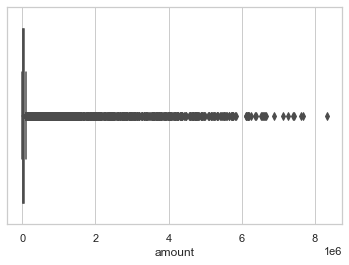

In [29]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_reducido["amount"])

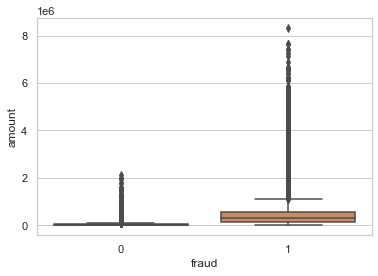

In [30]:
ax = sns.boxplot(x="fraud", y="amount", data=df_reducido)

In [31]:
df_reducido["amount"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    5.946430e+05
mean     3.789014e+04
std      1.114028e+05
min      0.000000e+00
10%      5.580000e+03
25%      1.374000e+04
50%      2.690000e+04
75%      4.254000e+04
90%      6.019000e+04
max      8.329960e+06
Name: amount, dtype: float64

In [32]:
def iqr_(df, variables, alpha = 1):

    
    for v in variables:
        q3 = df[v].quantile(.75)
        q1 = df[v].quantile(.25)        
        iqr = q3 - q1
        lb, up = q1-(alpha*iqr), q3+(alpha*iqr)
        df = df.loc[(df[v]>=lb) & (df[v]<=up)].copy()
        
    return(df)
iqr_(df_reducido,["amount"],alpha=1).shape[0]/df_reducido.shape[0]

0.9369083635054982

In [33]:
df_reducido=iqr_(df_reducido,["amount"],alpha=1)
df_reducido.reset_index(drop=True,inplace=True)
df_reducido

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,debt,term,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4550.0,0,384.701865,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
1,1,C1093826151,4,U,28007,M855959430,28007,es_hyper,14380.0,0,5346.143350,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
2,2,C1093826151,4,M,28007,M348934600,28007,es_transportation,37210.0,0,15249.782295,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
3,3,C1093826151,4,M,28007,M348934600,28007,es_transportation,31630.0,0,4101.539296,13,18.0,2.31,6.575,4.0900,0.0,15.3,4.98
4,4,C1093826151,4,M,28007,M348934600,28007,es_transportation,35860.0,0,14069.969512,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557121,101,C849065220,4,F,28007,M547558035,28007,es_fashion,44280.0,0,14435.818181,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73
557122,125,C849065220,4,F,28007,M980657600,28007,es_sportsandtoys,24700.0,0,11034.517175,0,0.0,5.13,6.456,7.2255,8.0,19.7,0.00
557123,140,C849065220,4,F,28007,M692898500,28007,es_health,44220.0,0,2231.904715,0,25.0,5.13,0.000,0.0000,8.0,19.7,0.00
557124,159,C849065220,4,U,28007,M1535107174,28007,es_wellnessandbeauty,32500.0,1,10707.487456,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73


# Ingenieria de variables

In [34]:
#Ingenieria de variables
df_reducido["pagado"]=df_reducido["amount"]-df_reducido["debt"]
df_reducido

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,debt,term,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4550.0,0,384.701865,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,4165.298135
1,1,C1093826151,4,U,28007,M855959430,28007,es_hyper,14380.0,0,5346.143350,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,9033.856650
2,2,C1093826151,4,M,28007,M348934600,28007,es_transportation,37210.0,0,15249.782295,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21960.217705
3,3,C1093826151,4,M,28007,M348934600,28007,es_transportation,31630.0,0,4101.539296,13,18.0,2.31,6.575,4.0900,0.0,15.3,4.98,27528.460704
4,4,C1093826151,4,M,28007,M348934600,28007,es_transportation,35860.0,0,14069.969512,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21790.030488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557121,101,C849065220,4,F,28007,M547558035,28007,es_fashion,44280.0,0,14435.818181,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,29844.181819
557122,125,C849065220,4,F,28007,M980657600,28007,es_sportsandtoys,24700.0,0,11034.517175,0,0.0,5.13,6.456,7.2255,8.0,19.7,0.00,13665.482825
557123,140,C849065220,4,F,28007,M692898500,28007,es_health,44220.0,0,2231.904715,0,25.0,5.13,0.000,0.0000,8.0,19.7,0.00,41988.095285
557124,159,C849065220,4,U,28007,M1535107174,28007,es_wellnessandbeauty,32500.0,1,10707.487456,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,21792.512544


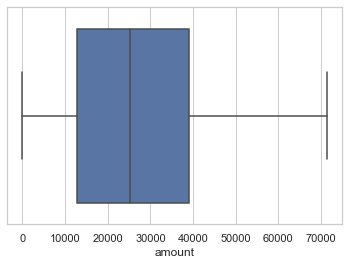

In [35]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_reducido["amount"])

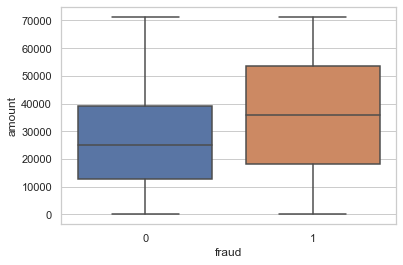

In [36]:
ax = sns.boxplot(x="fraud", y="amount", data=df_reducido)

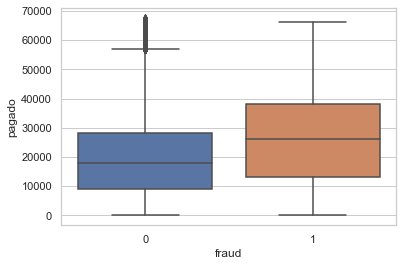

In [37]:
ax = sns.boxplot(x="fraud", y="pagado", data=df_reducido)

In [38]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot,iplot
import cufflinks as cf
pd.options.plotting.backend = "plotly"
cf.go_offline()
#Veamos las correlaciones entre variables conyinuas
df_reducido[["fraud","amount","pagado"]].corr(method="spearman").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [39]:
correlaciones = df_reducido[["fraud","amount","pagado"]].corr(method="spearman")
correlaciones=abs(correlaciones)
correlaciones[["fraud"]].sort_values(by ='fraud',ascending = False).style.background_gradient()

,fraud
fraud,1.000000
amount,0.017012
pagado,0.016579


In [40]:
df_reducido["category"].value_counts(dropna=False)

es_transportation        498963
es_food                   23517
es_wellnessandbeauty       9833
es_health                  6158
es_barsandrestaurants      5246
es_hyper                   5038
es_fashion                 3994
es_sportsandtoys           1176
es_tech                     950
es_contents                 700
es_home                     646
es_hotelservices            481
es_otherservices            388
es_travel                    23
es_leisure                   13
Name: category, dtype: int64

In [41]:
df_reducido["Porcentaje pagado"]=df_reducido["pagado"]/df_reducido["amount"]

In [42]:
df_reducido["Peso monto por customer"]=np.nan
for c in df_reducido["customer"].unique():
    aux = df_reducido.loc[df_reducido["customer"]==c]
    df_reducido.loc[df_reducido["customer"]==c,"Peso monto por customer"]=aux["amount"]/aux["amount"].sum()
df_reducido

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,debt,term,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado,Porcentaje pagado,Peso monto por customer
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4550.0,0,384.701865,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,4165.298135,0.915450,0.001021
1,1,C1093826151,4,U,28007,M855959430,28007,es_hyper,14380.0,0,5346.143350,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,9033.856650,0.628224,0.003228
2,2,C1093826151,4,M,28007,M348934600,28007,es_transportation,37210.0,0,15249.782295,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21960.217705,0.590170,0.008354
3,3,C1093826151,4,M,28007,M348934600,28007,es_transportation,31630.0,0,4101.539296,13,18.0,2.31,6.575,4.0900,0.0,15.3,4.98,27528.460704,0.870328,0.007101
4,4,C1093826151,4,M,28007,M348934600,28007,es_transportation,35860.0,0,14069.969512,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21790.030488,0.607642,0.008051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557121,101,C849065220,4,F,28007,M547558035,28007,es_fashion,44280.0,0,14435.818181,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,29844.181819,0.673988,0.303912
557122,125,C849065220,4,F,28007,M980657600,28007,es_sportsandtoys,24700.0,0,11034.517175,0,0.0,5.13,6.456,7.2255,8.0,19.7,0.00,13665.482825,0.553258,0.169526
557123,140,C849065220,4,F,28007,M692898500,28007,es_health,44220.0,0,2231.904715,0,25.0,5.13,0.000,0.0000,8.0,19.7,0.00,41988.095285,0.949527,0.303500
557124,159,C849065220,4,U,28007,M1535107174,28007,es_wellnessandbeauty,32500.0,1,10707.487456,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,21792.512544,0.670539,0.223061


In [43]:
df_reducido["Porcentaje no pagado"]=1-df_reducido["Porcentaje pagado"]

In [44]:
df_reducido=df_reducido.fillna(0)

In [45]:
df_reducido

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,debt,term,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado,Porcentaje pagado,Peso monto por customer,Porcentaje no pagado
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4550.0,0,384.701865,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,4165.298135,0.915450,0.001021,0.084550
1,1,C1093826151,4,U,28007,M855959430,28007,es_hyper,14380.0,0,5346.143350,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,9033.856650,0.628224,0.003228,0.371776
2,2,C1093826151,4,M,28007,M348934600,28007,es_transportation,37210.0,0,15249.782295,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21960.217705,0.590170,0.008354,0.409830
3,3,C1093826151,4,M,28007,M348934600,28007,es_transportation,31630.0,0,4101.539296,13,18.0,2.31,6.575,4.0900,0.0,15.3,4.98,27528.460704,0.870328,0.007101,0.129672
4,4,C1093826151,4,M,28007,M348934600,28007,es_transportation,35860.0,0,14069.969512,13,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21790.030488,0.607642,0.008051,0.392358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557121,101,C849065220,4,F,28007,M547558035,28007,es_fashion,44280.0,0,14435.818181,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,29844.181819,0.673988,0.303912,0.326012
557122,125,C849065220,4,F,28007,M980657600,28007,es_sportsandtoys,24700.0,0,11034.517175,0,0.0,5.13,6.456,7.2255,8.0,19.7,0.00,13665.482825,0.553258,0.169526,0.446742
557123,140,C849065220,4,F,28007,M692898500,28007,es_health,44220.0,0,2231.904715,0,25.0,5.13,0.000,0.0000,8.0,19.7,0.00,41988.095285,0.949527,0.303500,0.050473
557124,159,C849065220,4,U,28007,M1535107174,28007,es_wellnessandbeauty,32500.0,1,10707.487456,0,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,21792.512544,0.670539,0.223061,0.329461


# Reducción de dimensiones

In [46]:
def iv_woe(data, target, bins=20, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [47]:
#Separación de variables continuas y discretas
df_reducido.dtypes

step                         int64
customer                    object
age                         object
gender                      object
zipcodeOri                  object
merchant                    object
zipMerchant                 object
category                    object
amount                     float64
fraud                        int64
debt                       float64
term                         int64
enrichment_ZN              float64
enrichment_INDUS           float64
enrichment_RM              float64
enrichment_DIS             float64
enrichment_RAD             float64
enrichment_PTRATIO         float64
enrichment_LSTAT           float64
pagado                     float64
Porcentaje pagado          float64
Peso monto por customer    float64
Porcentaje no pagado       float64
dtype: object

In [48]:
no_incluir=["step","customer","zipcodeOri","merchant","zipMerchant"]
vdisc=["age","gender","category","term"]
target=["fraud"]
v_cont=[c for c in df_reducido.columns if c not in no_incluir+vdisc+target]
v_cont

['amount',
 'debt',
 'enrichment_ZN',
 'enrichment_INDUS',
 'enrichment_RM',
 'enrichment_DIS',
 'enrichment_RAD',
 'enrichment_PTRATIO',
 'enrichment_LSTAT',
 'pagado',
 'Porcentaje pagado',
 'Peso monto por customer',
 'Porcentaje no pagado']

In [49]:
is_canceled_woe = iv_woe(df_reducido[vdisc+target], 'fraud', bins=15, show_woe=False)

Information value of age is 0.017148
Information value of gender is 0.054638
Information value of category is 10.107998
Information value of term is 1.504732


In [50]:
IV=is_canceled_woe[0].sort_values(by="IV",ascending=False)
IV["Pronostico"]=np.nan
IV

,Variable,IV,Pronostico
0,category,10.107998,NaN
0,term,1.504732,NaN
0,gender,0.054638,NaN
0,age,0.017148,NaN


In [51]:
IV.loc[IV["IV"]<0.02,"Pronostico"]="No es útil para predecir"
IV.loc[(IV["IV"]>=0.02) & (IV["IV"]<.1),"Pronostico"]="Débil"
IV.loc[(IV["IV"]>=.1)&(IV["IV"]<.3),"Pronostico"]="Medio"
IV.loc[(IV["IV"]>=.3)&(IV["IV"]<.5),"Pronostico"]="Fuerte"
IV.loc[(IV["IV"]>=.5),"Pronostico"]="Sobrepredictiva"
IV

,Variable,IV,Pronostico
0,category,10.107998,Sobrepredictiva
0,term,1.504732,Sobrepredictiva
0,gender,0.054638,Débil
0,age,0.017148,No es útil para predecir


In [52]:
df_reducido[target+v_cont].corr(method="spearman").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [53]:
correlacion_target=df_reducido[target+v_cont].corr(method="spearman")
correlacion_target=abs(correlacion_target)
correlacion_target

,fraud,amount,debt,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado,Porcentaje pagado,Peso monto por customer,Porcentaje no pagado
fraud,1.000000,0.017012,0.011730,0.002888,0.003109,0.002164,0.004625,0.001656,0.001066,0.001081,0.016579,0.000899,0.037239,0.000886
amount,0.017012,1.000000,0.790193,0.000081,0.001058,0.000818,0.000490,0.002392,0.000635,0.001733,0.968163,0.001859,0.950996,0.002419
debt,0.011730,0.790193,1.000000,0.000054,0.000209,0.000691,0.000684,0.003292,0.000740,0.001087,0.630508,0.552247,0.756020,0.552807
enrichment_ZN,0.002888,0.000081,0.000054,1.000000,0.485605,0.271062,0.517848,0.201625,0.339829,0.367259,0.000103,0.000396,0.002746,0.000308
enrichment_INDUS,0.003109,0.001058,0.000209,0.485605,1.000000,0.270175,0.551990,0.290224,0.278286,0.415959,0.001069,0.000732,0.000017,0.000691
enrichment_RM,0.002164,0.000818,0.000691,0.271062,0.270175,1.000000,0.187932,0.061651,0.201869,0.421880,0.000835,0.000233,0.002189,0.000163
enrichment_DIS,0.004625,0.000490,0.000684,0.517848,0.551990,0.187932,1.000000,0.354983,0.224509,0.408202,0.000174,0.000616,0.002720,0.000614
enrichment_RAD,0.001656,0.002392,0.003292,0.201625,0.290224,0.061651,0.354983,1.000000,0.192338,0.250904,0.001861,0.002206,0.001677,0.002254
enrichment_PTRATIO,0.001066,0.000635,0.000740,0.339829,0.278286,0.201869,0.224509,0.192338,1.000000,0.302920,0.000444,0.001036,0.003923,0.000996
enrichment_LSTAT,0.001081,0.001733,0.001087,0.367259,0.415959,0.421880,0.408202,0.250904,0.302920,1.000000,0.001790,0.000284,0.000611,0.000245


In [54]:
correlacion_target[["fraud"]].sort_values(by ='fraud',ascending = False).style.background_gradient()

,fraud
fraud,1.000000
Peso monto por customer,0.037239
amount,0.017012
pagado,0.016579
debt,0.011730
enrichment_DIS,0.004625
enrichment_INDUS,0.003109
enrichment_ZN,0.002888
enrichment_RM,0.002164
enrichment_RAD,0.001656


In [55]:
#No hay ninguna variable numerica que sobre ajuste el modelo y las categoricas no son necesarias para el modelo
df_modelo=df_reducido[v_cont].copy()
df_modelo

,amount,debt,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado,Porcentaje pagado,Peso monto por customer,Porcentaje no pagado
0,4550.0,384.701865,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,4165.298135,0.915450,0.001021,0.084550
1,14380.0,5346.143350,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,9033.856650,0.628224,0.003228,0.371776
2,37210.0,15249.782295,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21960.217705,0.590170,0.008354,0.409830
3,31630.0,4101.539296,18.0,2.31,6.575,4.0900,0.0,15.3,4.98,27528.460704,0.870328,0.007101,0.129672
4,35860.0,14069.969512,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,21790.030488,0.607642,0.008051,0.392358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557121,44280.0,14435.818181,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,29844.181819,0.673988,0.303912,0.326012
557122,24700.0,11034.517175,0.0,5.13,6.456,7.2255,8.0,19.7,0.00,13665.482825,0.553258,0.169526,0.446742
557123,44220.0,2231.904715,25.0,5.13,0.000,0.0000,8.0,19.7,0.00,41988.095285,0.949527,0.303500,0.050473
557124,32500.0,10707.487456,25.0,5.13,6.456,7.2255,8.0,19.7,6.73,21792.512544,0.670539,0.223061,0.329461


# Balanceamiento de clases

In [56]:
#from imblearn.over_sampling import SMOTE
#df_target=df_reducido[["fraud"]]
#smote = SMOTE(sampling_strategy='minority', random_state=0)
#df_modelo, df_target = smote.fit_resample(df_modelo, df_target)

In [57]:
#from imblearn.under_sampling import RandomUnderSampler
#ran=RandomUnderSampler()
#df_target=df_reducido[["fraud"]]
#df_modelo, df_target= ran.fit_resample(df_modelo, df_target)

In [58]:
from imblearn.over_sampling import RandomOverSampler
ran=RandomOverSampler()
df_target=df_reducido[["fraud"]]
df_modelo, df_target= ran.fit_resample(df_modelo, df_target)

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fraud', ylabel='count'>

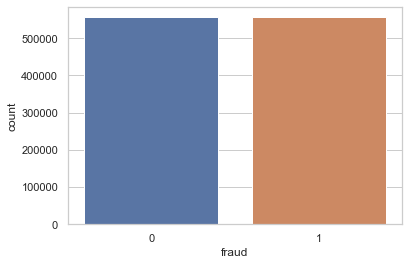

In [59]:
sns.countplot(df_target["fraud"])

In [60]:
df_target.shape

(1112576, 1)

In [61]:
df_modelo.shape

(1112576, 13)

# Estandarización de los datos

In [62]:
#Estandarizacion de los datos
# Import la clase
from sklearn.preprocessing import StandardScaler

# Instanciamos la clase
sc = StandardScaler()

# Ajustamos la clase
sc.fit(df_modelo)

# Transformamos nuestro dataframe
X = pd.DataFrame(sc.transform(df_modelo), columns = df_modelo.columns, index = df_modelo.index)
X

,amount,debt,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado,Porcentaje pagado,Peso monto por customer,Porcentaje no pagado
0,-1.391784,-1.150205,0.270873,-1.032147,0.468223,0.131564,-0.856465,-0.198799,-0.837463,-1.276833,1.454841,-0.459325,-1.455474
1,-0.882986,-0.439027,0.270873,-1.032147,0.468223,0.131564,-0.856465,-0.198799,-0.837463,-0.947317,-0.833071,-0.405252,0.834019
2,0.298690,0.980572,0.270873,-1.032147,0.468223,0.131564,-0.856465,-0.198799,-0.837463,-0.072429,-1.136191,-0.279668,1.137348
3,0.009871,-0.617429,0.270873,-1.032147,0.468223,0.131564,-0.969415,-0.198799,-0.837463,0.304444,1.095415,-0.310363,-1.095800
4,0.228815,0.811456,0.270873,-1.032147,0.468223,0.131564,-0.856465,-0.198799,-0.837463,-0.083947,-0.997018,-0.287095,0.998079
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112571,0.923949,-0.607087,-0.470653,-0.326684,0.386183,0.402008,-0.404664,0.515926,-0.692249,1.494833,1.453834,-0.090351,-1.454467
1112572,0.112873,0.461907,-0.470653,-0.220934,0.026236,0.192843,-0.517614,-2.741890,1.406986,-0.070507,-0.627480,1.041456,0.628286
1112573,0.716909,-0.673110,-0.470653,-0.902742,0.344138,0.613486,-0.517614,0.067145,-0.536844,1.255278,1.475273,0.212023,-1.475920
1112574,-1.132468,-0.606222,-0.470653,1.164945,0.381056,-0.902558,1.741388,0.615655,0.995546,-1.194601,-1.354286,-0.125774,1.355595


In [63]:
X.describe()

,amount,debt,enrichment_ZN,enrichment_INDUS,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_PTRATIO,enrichment_LSTAT,pagado,Porcentaje pagado,Peso monto por customer,Porcentaje no pagado
count,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06,1.112576e+06
mean,4.230394e-17,-1.070882e-16,7.382753e-17,-7.694413e-17,1.975844e-16,-2.391092e-17,-3.027823e-17,4.987573e-16,-2.072280e-16,-2.348175e-16,4.934055e-16,-2.656769e-17,-5.034642e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.627291e+00,-1.205349e+00,-4.706527e-01,-1.353570e+00,-2.903084e+00,-1.621113e+00,-9.694147e-01,-2.741890e+00,-1.471819e+00,-1.558751e+00,-5.837207e+00,-4.843542e-01,-2.129424e+00
25%,-8.358842e-01,-7.846760e-01,-4.706527e-01,-8.749133e-01,2.623553e-02,-7.671008e-01,-6.305645e-01,-9.907012e-02,-7.215462e-01,-8.282228e-01,-8.731862e-01,-3.716029e-01,-8.536117e-01
50%,-8.329689e-02,-2.703571e-01,-4.706527e-01,-2.585033e-01,2.349233e-01,-2.501682e-01,-4.046643e-01,3.164677e-01,-1.712613e-01,-1.103257e-01,1.850809e-02,-2.618007e-01,-1.846611e-02
75%,7.577997e-01,5.217315e-01,4.429593e-02,1.164945e+00,4.354071e-01,6.932350e-01,-6.581399e-02,6.156549e-01,6.044875e-01,7.291569e-01,8.533944e-01,-9.500306e-02,8.738095e-01
max,2.065252e+00,3.749458e+00,3.648937e+00,2.506297e+00,1.598828e+00,3.575425e+00,1.741388e+00,9.148421e-01,3.364828e+00,3.024020e+00,1.730032e+00,2.401802e+01,1.752464e+00


In [64]:
X.isnull().sum()

amount                     0
debt                       0
enrichment_ZN              0
enrichment_INDUS           0
enrichment_RM              0
enrichment_DIS             0
enrichment_RAD             0
enrichment_PTRATIO         0
enrichment_LSTAT           0
pagado                     0
Porcentaje pagado          0
Peso monto por customer    0
Porcentaje no pagado       0
dtype: int64

# Modelación no supervisada

## PCA (En dimension 2)

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [66]:
pca.fit(X)

PCA(n_components=2)

In [67]:
pca.explained_variance_ratio_

array([0.212987  , 0.20829574])

In [68]:
pca.explained_variance_ratio_.cumsum()

array([0.212987  , 0.42128274])

In [69]:
Xp = pd.DataFrame(pca.transform(X),columns=['p1','p2'])
Xp

,p1,p2
0,2.274428,-2.256394
1,1.703395,-0.158439
2,1.013091,1.722212
3,1.618514,-0.431375
4,1.077461,1.509569
...,...,...
1112571,0.385579,0.005139
1112572,-0.170144,0.869000
1112573,0.861650,-0.027876
1112574,-1.825933,-1.338440


In [70]:
Xp.corr()

,p1,p2
p1,1.000000e+00,7.210269e-16
p2,7.210269e-16,1.000000e+00


In [71]:
Xp['label'] = df_target['fraud']
Xp

,p1,p2,label
0,2.274428,-2.256394,0
1,1.703395,-0.158439,0
2,1.013091,1.722212,0
3,1.618514,-0.431375,0
4,1.077461,1.509569,0
...,...,...,...
1112571,0.385579,0.005139,1
1112572,-0.170144,0.869000,1
1112573,0.861650,-0.027876,1
1112574,-1.825933,-1.338440,1


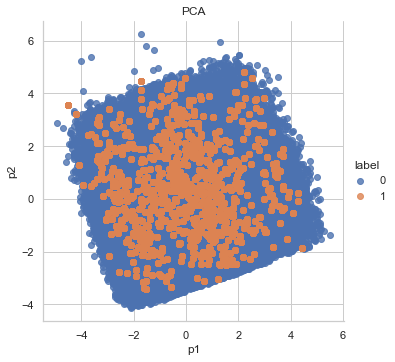

In [72]:
sns.lmplot(data=Xp.sample(frac=0.5),x='p1',y='p2',fit_reg=False,hue='label').set(title="PCA")

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='label', ylabel='count'>

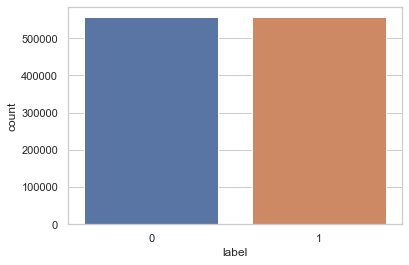

In [73]:
sns.countplot(Xp["label"])

In [74]:
Xp["label"].value_counts(1,dropna=False)

0    0.5
1    0.5
Name: label, dtype: float64

In [75]:
df_target["fraud"].value_counts(1,dropna=False)

0    0.5
1    0.5
Name: fraud, dtype: float64

# TSNE

In [76]:
(df_reducido.shape[0]*0.1)/df_modelo.shape[0]

0.050075320697192824

In [77]:
df_modelo.shape[0]*0.05

55628.8

In [78]:
df_reducido.shape[0]*0.1

55712.600000000006

In [79]:
df_reducido.shape[0]/df_modelo.shape[0]

0.5007532069719282

In [80]:
df_modelo.shape[0]*0.5

556288.0

In [82]:
df_reducido.shape[0]

557126

In [83]:
from sklearn.manifold import TSNE

In [84]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=400)

In [85]:
X_sample=X.sample(frac=.5) #Creacion de la muestra con 1% de los datos
indice = list(X_sample.index)
Y_sample= df_target.loc[df_target.index.isin(indice)]
Y_sample.reset_index(drop=True,inplace=True)

In [86]:
X_sample.shape

(556288, 13)

In [87]:
Xt  = pd.DataFrame(tsne.fit_transform(X_sample),columns=['t1','t2'])

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



In [88]:
tsne.kl_divergence_ #Divergencia de kurbal

3.2259135246276855

In [89]:
Xt['label'] = Y_sample['fraud']

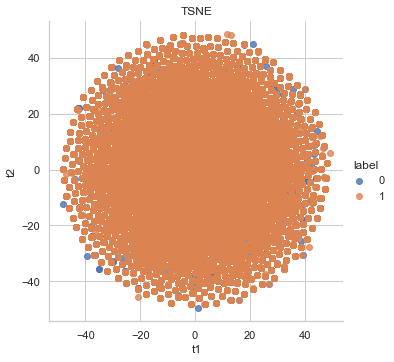

In [90]:
sns.lmplot(data=Xt.sample(frac=0.5),x='t1',y='t2',fit_reg=False,hue='label').set(title="TSNE")

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='label', ylabel='count'>

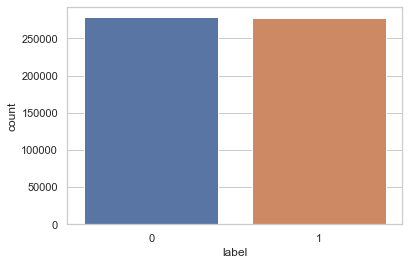

In [91]:
sns.countplot(Xt["label"])

# MDS

In [92]:
from sklearn.manifold import MDS
mds = MDS(n_components=2,n_jobs=-1)

In [93]:
X_sample=X.sample(frac=.05) #Creacion de la muestra con 1% de los datos
indice = list(X_sample.index)
Y_sample= df_target.loc[df_target.index.isin(indice)]
Y_sample.reset_index(drop=True,inplace=True)

In [94]:
X_sample.shape

(55629, 13)

In [ ]:
Xm  = pd.DataFrame(mds.fit_transform(X_sample),columns=['d1','d2'])
Xm

In [ ]:
Xm['label'] = Y_sample['fraud']

In [ ]:
Xm

In [ ]:
sns.lmplot(data=Xm.sample(frac=0.5),x='d1',y='d2',fit_reg=False,hue='label').set(title="MDS")

In [ ]:
sns.countplot(Xm["label"])

In [ ]:
(X_sample.shape[0]/df_reducido.shape[0])*100